# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from palmerpenguins import load_penguins

In [31]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [32]:
# Dummify categorical variables
penguinsDummified = pd.get_dummies(penguins, drop_first=True)

# Display the first few rows of the dummified dataset
penguinsDummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


In [ ]:
penguins = penguins[['bill_length_mm', 'bill_depth_mm']].dropna()

In [34]:
# Extract features and target variable
X = penguins[['bill_length_mm']].values
y = penguins['bill_depth_mm'].values

ChatGPT was used to debug the code

In [35]:
# Initialize a plot
plt.scatter(X, y, color='blue', alpha=0.5)

# Define a range of values for plotting model predictions
x_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

# Function to fit, predict, and plot models of different degrees
def plot_polynomial_regression(degree, color):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, color=color, label=f'Degree {degree}')

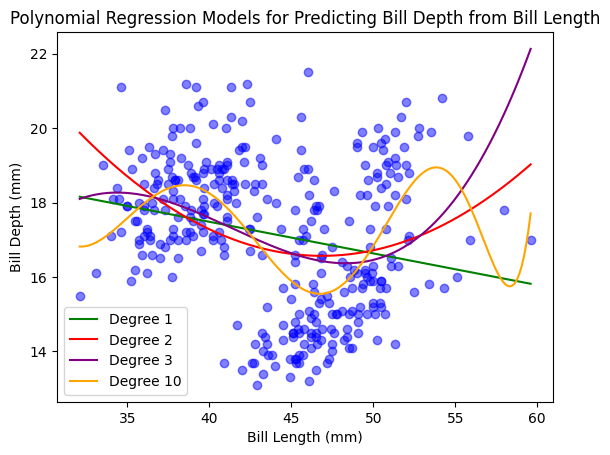

In [ ]:
# Fit and plot models with different degrees
plot_polynomial_regression(1, 'green')  
plot_polynomial_regression(2, 'red')    
plot_polynomial_regression(3, 'purple') 
plot_polynomial_regression(10, 'orange')

# Labeling the plot
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Polynomial Regression Models for Predicting Bill Depth from Bill Length')
plt.legend()
plt.show()

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

* Linear Model is underfitting the most as the regression line doesn't really follow the the data pattern.
* Degree 10 model is overfitting as the regression line tries to fit the data closely as possible.
* Cubic Model is best among the 4 as it follow the data pattern but not to so too much and not too less.